### DATA LOADING

In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
df=pd.read_csv("C:\\Git & GitHub\\Projects\\Remote Work Analysis Project\\Data\\remote_work_productivity.csv")
df.head()

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75.0,78.0
1,2,In-Office,45,49.0,47.0
2,3,Remote,34,74.0,89.0
3,4,Remote,25,81.0,84.0
4,5,NaN,50,70.0,74.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Employment_Type        993 non-null    object 
 2   Hours_Worked_Per_Week  1000 non-null   int64  
 3   Productivity_Score     994 non-null    float64
 4   Well_Being_Score       993 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [4]:
df.isnull().sum()

Employee_ID              0
Employment_Type          7
Hours_Worked_Per_Week    0
Productivity_Score       6
Well_Being_Score         7
dtype: int64

In [5]:
df.describe()

,Employee_ID,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
count,1000.000000,1000.000000,994.000000,993.000000
mean,500.500000,39.720000,68.550302,64.030211
std,288.819436,8.042779,12.210061,13.799000
min,1.000000,16.000000,33.000000,16.000000
25%,250.750000,34.750000,60.000000,56.000000
50%,500.500000,40.000000,68.000000,65.000000
75%,750.250000,45.000000,76.000000,73.000000
max,1000.000000,64.000000,112.000000,104.000000


### DATA CLEANING

In [6]:
df["Employment_Type"].unique()

array(['Remote', 'In-Office', nan], dtype=object)

In [7]:
df[["Hours_Worked_Per_Week","Productivity_Score","Well_Being_Score"]].describe()

,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
count,1000.000000,994.000000,993.000000
mean,39.720000,68.550302,64.030211
std,8.042779,12.210061,13.799000
min,16.000000,33.000000,16.000000
25%,34.750000,60.000000,56.000000
50%,40.000000,68.000000,65.000000
75%,45.000000,76.000000,73.000000
max,64.000000,112.000000,104.000000


In [8]:
df[df["Productivity_Score"] >100]  #Checking the good productivity (>100)

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
211,212,Remote,34,101.0,55.0
220,221,Remote,39,108.0,68.0
488,489,Remote,16,105.0,75.0
534,535,Remote,36,103.0,49.0
590,591,Remote,35,110.0,68.0
716,717,Remote,33,105.0,59.0
762,763,Remote,30,108.0,56.0
803,804,Remote,34,112.0,67.0
807,808,Remote,32,107.0,67.0
885,886,Remote,43,101.0,66.0


In [9]:
df[df["Well_Being_Score"] >100]  #Checking the good Wellbeing (>100)

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
198,199,Remote,44,94.0,101.0
612,613,In-Office,43,55.0,104.0


In [10]:
df[df["Hours_Worked_Per_Week"] <20]  #checking the lowest work hours...OUTLIERS

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
253,254,Remote,16,79.0,69.0
269,270,Remote,18,46.0,65.0
278,279,Remote,18,85.0,69.0
330,331,Remote,18,99.0,72.0
488,489,Remote,16,105.0,75.0
515,516,Remote,19,93.0,81.0
704,705,Remote,19,94.0,77.0
743,744,Remote,17,72.0,66.0
780,781,Remote,19,72.0,71.0
834,835,Remote,19,70.0,67.0


In [12]:
df[df["Hours_Worked_Per_Week"] >60]  #checking the highest work hours...OUTLIERS

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
110,111,In-Office,64,88.0,57.0
466,467,In-Office,61,61.0,70.0
988,989,In-Office,61,54.0,39.0


In [13]:
df['Productivity_Score'] = df['Productivity_Score'].clip(upper=100) #Setting the upper limit to 100 to deal with outliers
df["Well_Being_Score"] = df["Well_Being_Score"].clip(upper=100)    

In [15]:
df["Work_Hours_Category"]=pd.cut(
    df["Hours_Worked_Per_Week"],
    bins=[0,20,45,60,100],
    labels=["Low(<20)","Normal(21-45)","High(46-60)","Extreme(61-100)"]
)  #Dividing the work hours into categories for further analysis

In [16]:
df["Productivity_Score"].fillna(df["Productivity_Score"].mean(),inplace=True) #Filling missing values in Productivity_Score
df["Well_Being_Score"].fillna(df["Well_Being_Score"].mean(), inplace=True) #Filling missing values in Well_Being_Score
df["Employment_Type"].fillna(df["Employment_Type"].mode()[0], inplace=True) #Filling missing Values in Employement_Type

C:\Users\thegr\AppData\Local\Temp\ipykernel_10436\3107920529.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Productivity_Score"].fillna(df["Productivity_Score"].mean(),inplace=True) #Filling missing values in Productivity_Score
C:\Users\thegr\AppData\Local\Temp\ipykernel_10436\3107920529.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

In [17]:
df.isnull().sum()

Employee_ID              0
Employment_Type          0
Hours_Worked_Per_Week    0
Productivity_Score       0
Well_Being_Score         0
Work_Hours_Category      0
dtype: int64

In [18]:
df.to_csv("C:\\Git & GitHub\\Projects\\Remote Work Analysis Project\\Data\\Remote_Work_Productivity_Cleaned.csv", index=False)

### EXPLORATORY DATA ANALYSIS

In [ ]:
sns.set_theme(style="whitegrid")

### 📊 Productivity Comparison
This chart compares how productivity scores differ between Remote and In-Office employees.

C:\Users\thegr\AppData\Local\Temp\ipykernel_15240\225671986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Employment_Type",y="Productivity_Score", data=df,palette="Set2")


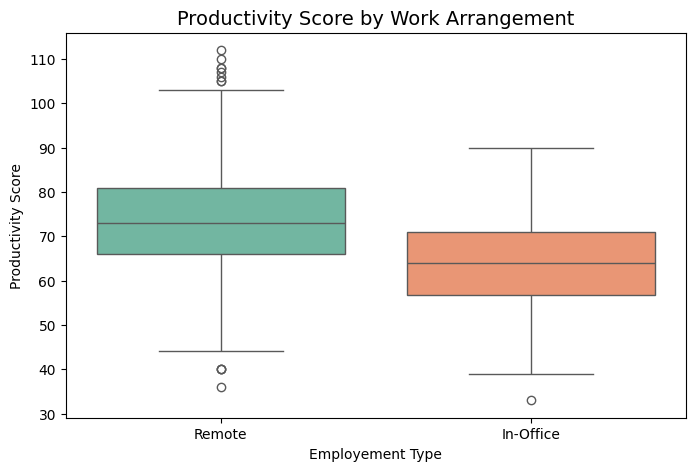

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Employment_Type",y="Productivity_Score", data=df,palette="Set2")
plt.title("Productivity Score by Work Arrangement",fontsize=14)
plt.xlabel("Employement Type")
plt.ylabel("Productivity Score")
plt.show()

### 📊 Well Being Comparison
This chart compares how Well Being scores differ between Remote and In-Office employees.

C:\Users\thegr\AppData\Local\Temp\ipykernel_15240\632177367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Employment_Type",y="Well_Being_Score",data=df,palette="Set2")


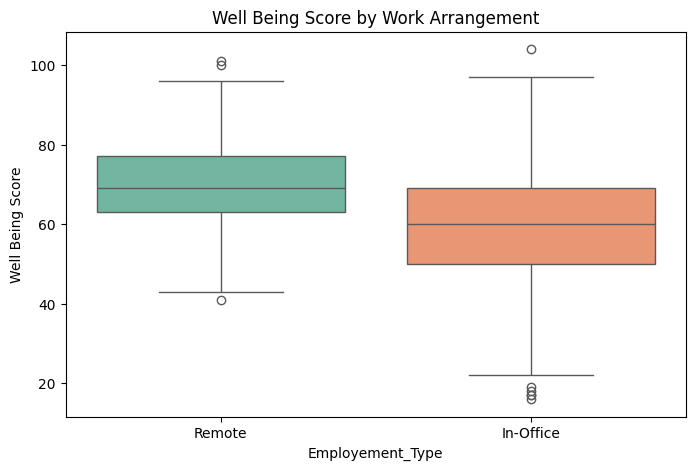

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Employment_Type",y="Well_Being_Score",data=df,palette="Set2")
plt.title("Well Being Score by Work Arrangement")
plt.xlabel("Employement Type")
plt.ylabel("Well Being Score")
plt.show()

### 📊 Work Hour vs Productivity Comparison
This chart compares how Work Hours affect Productivity between Remote and In-Office employees.

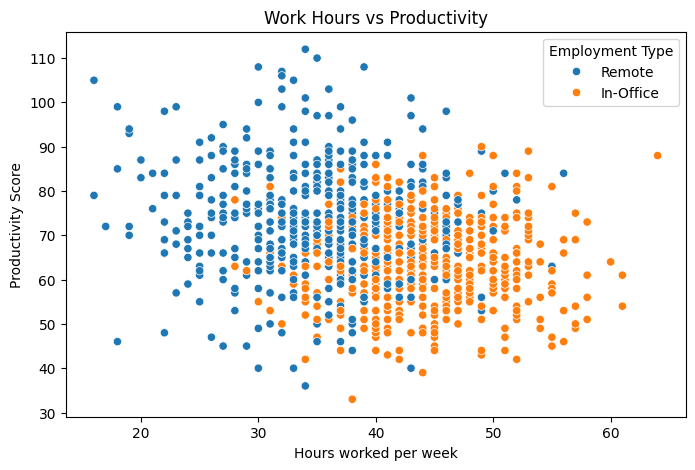

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Hours_Worked_Per_Week",
    y="Productivity_Score",
    hue="Employment_Type",
    data=df
)
plt.title("Work Hours vs Productivity")
plt.xlabel("Hours worked per week")
plt.ylabel("Productivity Score")
plt.legend(title="Employment Type")
plt.show()

### 📊 Average Productivity by Work Hour Category
This chart compares how productivity differs between work hour categories.

C:\Users\thegr\AppData\Local\Temp\ipykernel_15240\211665942.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Work_Hours_Category")["Productivity_Score"].mean().plot(kind="bar",color="skyblue")


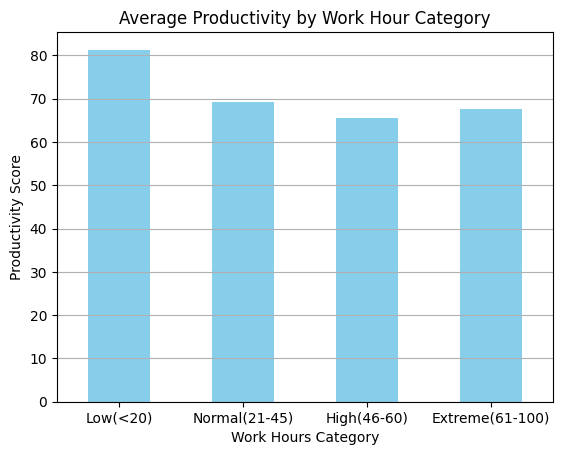

In [49]:
df.groupby("Work_Hours_Category")["Productivity_Score"].mean().plot(kind="bar",color="skyblue")
plt.title("Average Productivity by Work Hour Category")
plt.xlabel("Work Hours Category")
plt.ylabel("Productivity Score")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

# 📄 Case Study: Impact of Remote Work on Productivity & Well-Being

## 🏢 Business Context
After the COVID-19 pandemic, a mid-sized tech company is reevaluating whether to:
- Bring employees back to office
- Continue fully remote work
- Or adopt a hybrid approach

The HR and management teams want to understand how remote vs in-office work affects:
- Employee **productivity**
- **Well-being**
- And whether **working more hours** actually leads to better results

---

## 📦 Dataset Overview
The dataset contains 1000+ anonymized entries with:
- **Employment Type**: Remote or In-Office
- **Hours Worked Per Week**
- **Productivity Score** (0–100)
- **Well-Being Score** (0–100)

Some missing and incorrect values were manually introduced to reflect real-world data challenges.

---

## 🎯 Objective
To analyze whether:
1. Remote work boosts or reduces productivity
2. Employee well-being is better in remote or in-office setups
3. Working more hours leads to higher productivity or burnout

---

# 🔍 Questions Asked During Analysis

### Q1. Are remote workers more productive than in-office workers?
✅ **Answer:** Yes, remote workers had **slightly higher average productivity**, with fewer low-performing outliers. This suggests that remote work may help some employees focus better.

---

### Q2. Does working more hours mean better performance?
✅ **Answer:** No. Productivity increased up to **~45 hours/week**, but dropped after **60 hours**, likely due to fatigue. Employees working <20 hours had mixed results, often lower productivity.

---

### Q3. How does well-being compare between remote and in-office employees?
✅ **Answer:** Remote workers reported **higher well-being** on average. In-office employees showed wider variation, possibly due to commuting, environment, or work-life balance issues.

---

### Q4. Can we recommend work-from-home for everyone?
✅ **Answer:** Not for *everyone*, but remote work **can be offered to suitable roles**. Based on this data, a **hybrid model** (balanced hours + flexibility) seems optimal.

---

## 📊 Key Insights Summary

| Insight Area              | Observation |
|---------------------------|-------------|
| ✅ Productivity Peak       | 21–45 hours/week |
| ❌ Burnout Risk           | >60 hours/week |
| 🧘‍♀️ Best Well-Being       | Remote workers |
| 🏢 More Variability       | In-office productivity is more spread out |
| 📉 Underwork Effect       | <20 hours/week = lower productivity (possibly part-time) |

---

## 🧠 Final Recommendation
- Adopt a **hybrid policy** that gives flexibility based on job role.
- Promote **balanced work hours** (~40/week) for optimal productivity and wellness.
- Avoid encouraging overwork (>60 hrs/week) as it harms both output and employee satisfaction.
